In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = pd.Series(
    np.random.randn(100), index=pd.date_range("1/24/2022", periods=100)
)
ts

2022-01-24   -3.070654
2022-01-25    1.217585
2022-01-26   -0.174696
2022-01-27    2.070622
2022-01-28   -0.513929
                ...   
2022-04-29    0.184414
2022-04-30    1.675366
2022-05-01   -1.176242
2022-05-02   -0.007363
2022-05-03    0.074622
Freq: D, Length: 100, dtype: float64

<AxesSubplot:>

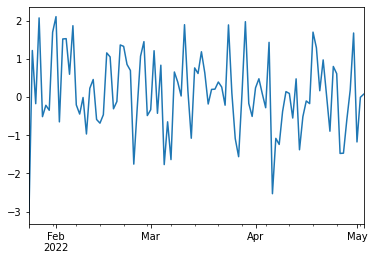

In [3]:
ts.plot()

In [7]:
df = pd.DataFrame(
    np.random.randn(100, 4), index=ts.index, columns=list("ABCD")
)
df

,A,B,C,D
2022-01-24,0.802844,-0.650231,-0.818590,1.497206
2022-01-25,1.293370,0.177821,0.692148,1.732057
2022-01-26,-0.264816,1.782635,-1.560020,2.595798
2022-01-27,-1.585316,-1.351214,-0.812330,-0.732103
2022-01-28,-0.056788,-0.881102,0.463386,0.437886
...,...,...,...,...
2022-04-29,-1.104872,-1.421957,0.171688,0.254402
2022-04-30,-0.290602,-0.511155,0.785184,-0.864997
2022-05-01,-0.274876,-0.967559,-0.335398,0.785712
2022-05-02,0.480602,-0.967757,0.381072,-0.501018


<AxesSubplot:>

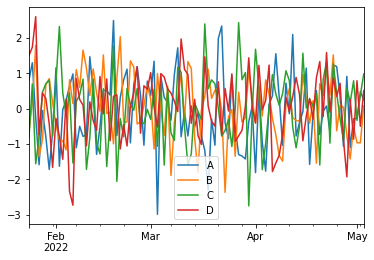

In [10]:
df.plot()

In [12]:
df.iloc[5]

A   -0.806265
B    0.680200
C    0.702773
D    0.278574
Name: 2022-01-29 00:00:00, dtype: float64

<AxesSubplot:>

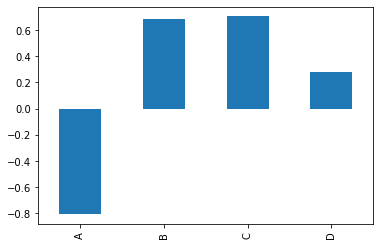

In [18]:
df.iloc[5].plot(kind="bar") 
#kind = 'bar' 'hist' 'box' 'kde' 'area' 'scatter' 'hexbin' or 'pie'

In [20]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2

,a,b,c,d
0,0.847871,0.587330,0.601791,0.962213
1,0.368750,0.416606,0.140050,0.104856
2,0.310531,0.366701,0.237596,0.780015
3,0.118547,0.392939,0.731565,0.254899
4,0.520321,0.099038,0.890782,0.091327
5,0.379215,0.007832,0.344846,0.638460
6,0.615181,0.425214,0.092847,0.352327
7,0.766171,0.920595,0.289199,0.992082
8,0.811612,0.810582,0.003942,0.309350
9,0.884089,0.347913,0.735301,0.333718


<AxesSubplot:>

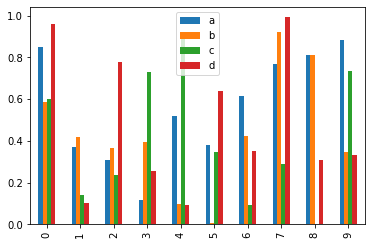

In [21]:
df2.plot.bar()

<AxesSubplot:>

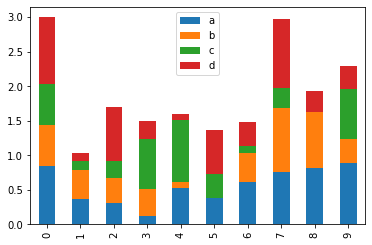

In [22]:
df2.plot.bar(stacked=True) #将柱摞在一起，竖着放

<AxesSubplot:>

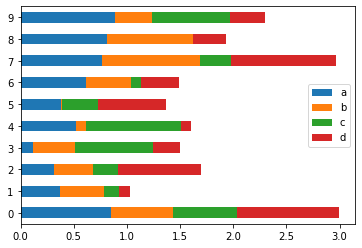

In [23]:
df2.plot.barh(stacked=True) #横着放

In [24]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4

,a,b,c
0,2.583852,-0.797772,0.466922
1,1.487500,-0.032064,0.326699
2,0.292851,-0.270106,-0.372790
3,0.071028,-1.133910,-0.065381
4,-0.672779,-1.466548,0.379985
...,...,...,...
995,1.559424,0.835946,0.319098
996,1.946310,-1.008894,-1.687309
997,0.530243,1.375437,-3.307647
998,0.976196,0.086543,-0.028001


<AxesSubplot:ylabel='Frequency'>

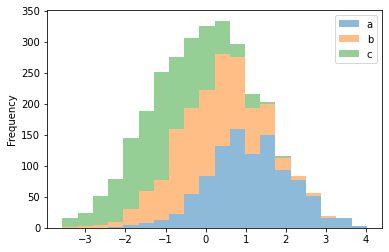

In [26]:
df4.plot.hist(alpha=0.5,stacked=True,bins=20) #直方图

<AxesSubplot:>

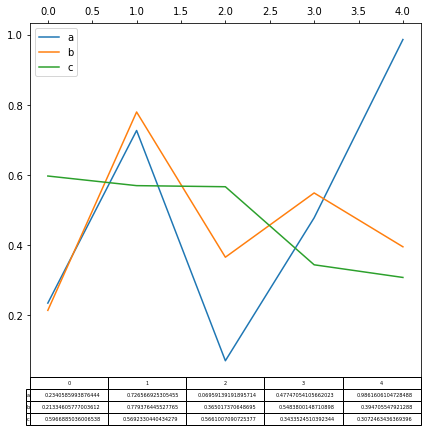

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5))
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"])
ax.xaxis.tick_top()
df.plot(table=True, ax=ax)

<AxesSubplot:>

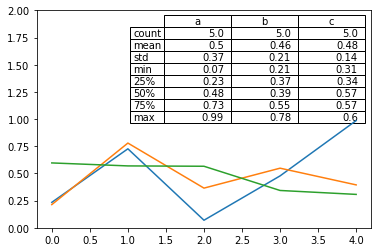

In [33]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)
table(
    ax, 
    np.round(df.describe(), 2), 
    loc="upper right",  #可改 upper/bottom right/left
    colWidths=[0.2, 0.2, 0.2]
)
df.plot(ax=ax, ylim=(0, 2), legend=None)

In [35]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(6,4), columns=['A','B','C','D'])
df2.style

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165


In [39]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' 
                        if (v < 0.3) and (v > -0.3) else None)  
#负的标红，在-0.3到0.3之间变淡
s2

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165


In [38]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)
#满足条件的地方加底色

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
